In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%matplotlib inline

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math
import zeus
from modules import init_cosmology, init_sample, PNGModel, Posterior, read_mocks

In [5]:
# --- theory
cosmo = init_cosmology()
z, b, dNdz = init_sample()
model = PNGModel(cosmo, has_fnl=True, has_rsd=True)
model.add_tracer(z, b, dNdz)

NOTE: This code uses a cosmology calculator that returns k and P(k) in units of 1/Mpc and Mpc^3.
 Therefore, the coefficient alpha in the model uses H_0 = 100h, not H_0=100.


In [8]:
x, y, invcov, cov = read_mocks(return_cov=True)

bins: [  3   5   7   9  11  13  15  17  19  26  48  96 192 384]


will create windows


Text(0, 0.5, 'C$_{\\ell}$')

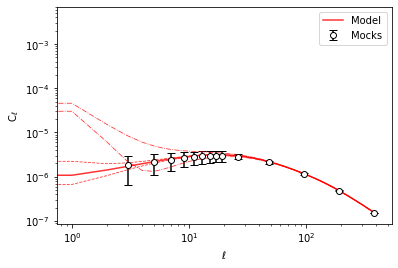

In [10]:
plt.errorbar(x, y, yerr=np.diag(cov)**0.5, 
             ls='none', color='k', marker='o', mfc='w', capsize=4, 
             label='Mocks')

x_ = np.arange(0, 400)

plt.plot(x_, model(x_), 'r-', label='Model', alpha=0.8)
plt.plot(x_, model(x_, fnl=10.), 'r--', alpha=0.8, lw=0.8)
plt.plot(x_, model(x_, fnl=-10.), 'r--', alpha=0.8, lw=0.8)
plt.plot(x_, model(x_, fnl=100.), 'r-.', alpha=0.8, lw=0.8)
plt.plot(x_, model(x_, fnl=-100.), 'r-.', alpha=0.8, lw=0.8)

plt.loglog()
plt.legend()
plt.xlabel(r'$\ell$')
plt.ylabel('C$_{\ell}$')
# plt.savefig('mocks_model.png', dpi=300, bbox_inches='tight')

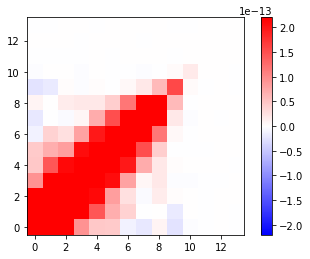

In [23]:
plt.imshow(cov, origin='lower', cmap=plt.cm.bwr, vmin=-2.2e-13, vmax=2.2e-13)
plt.colorbar()

In [24]:
lp = Posterior(model)

In [25]:
ndim = 1      # Number of parameters/dimensions (e.g. m and c)
nwalkers = 10 # Number of walkers to use. It should be at least twice the number of dimensions.
nsteps = 100  # Number of steps/iterations.

start = 0.01 * np.random.randn(nwalkers, ndim) # Initial positions of the walkers.
print(f'initial guess: {start}')

sampler = zeus.EnsembleSampler(nwalkers, ndim, lp.logpost, args=[y, invcov, x]) # Initialise the sampler
sampler.run_mcmc(start, nsteps) # Run sampling
sampler.summary # Print summary diagnostics

Initialising ensemble of 10 walkers...
Sampling progress :   0%|          | 0/100 [00:00<?, ?it/s]

initial guess: [[ 2.89011628e-03]
 [-1.54413055e-05]
 [ 5.84436367e-03]
 [-4.84586103e-03]
 [ 1.94344516e-02]
 [-6.04638158e-03]
 [ 1.13511003e-03]
 [ 5.17855007e-03]
 [-4.80243058e-03]
 [-3.24061920e-03]]
will update windows


RuntimeError: Number of expansions exceeded maximum limit! 
Make sure that the pdf is well-defined. 
Otherwise increase the maximum limit (maxiter=10^4 by default).

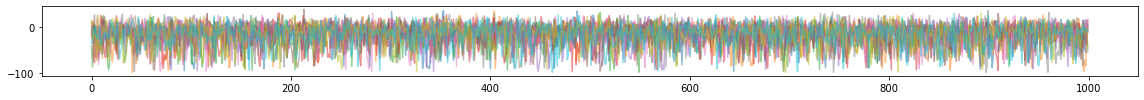

In [9]:
plt.figure(figsize=(16, 1.5*ndim))
for n in range(ndim):
    plt.subplot2grid((ndim, 1), (n, 0))
    plt.plot(sampler.get_chain()[:,:,0], alpha=0.5)
plt.tight_layout()
plt.show()

In [10]:
# flatten the chains, thin them by a factor of 10, 
# and remove the burn-in (first half of the chain)
chain = sampler.get_chain(flat=True, discard=20, thin=5)

In [11]:
np.save('chains.npy', chain)  # 

In [12]:
bins = np.arange(-100, 100., 3.8*np.std(chain)/(chain.size)**(1./3)) #
bins

array([-100.        ,  -92.52403702,  -85.04807403,  -77.57211105,
        -70.09614806,  -62.62018508,  -55.14422209,  -47.66825911,
        -40.19229613,  -32.71633314,  -25.24037016,  -17.76440717,
        -10.28844419,   -2.81248121,    4.66348178,   12.13944476,
         19.61540775,   27.09137073,   34.56733372,   42.0432967 ,
         49.51925968,   56.99522267,   64.47118565,   71.94714864,
         79.42311162,   86.8990746 ,   94.37503759])

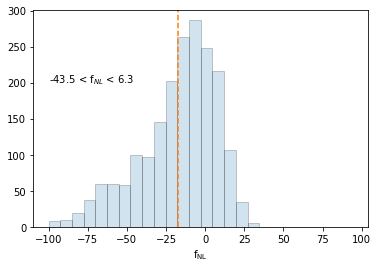

In [13]:
_= plt.hist(chain,
            bins=bins, 
            color='C0', alpha=0.2, edgecolor='k')
plt.axvline(np.mean(chain), color='C1', ls='--')
fmin, fmax = np.percentile(chain, [15.7, 84.3])
plt.text(-100, 200, fr"{fmin:.1f} < f$_{'{NL}'}$ < {fmax:.1f}")

plt.xlabel(r'f$_{\rm NL}$')
plt.savefig('fnl.png', dpi=300, bbox_inches='tight')

In [14]:
np.mean(chain)

-17.32578138849146

In [15]:
np.percentile(chain, [15.7, 84.3])

array([-43.48264087,   6.27478824])